In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
df1= pd.read_excel('report-raw.xlsx',
                 skiprows=2,
                 header=0) 
df1.head()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Campaign name,Ad set name,Messaging outcome destination,Month,Unnamed: 5,Delivery status,Delivery level,Reach,Impressions,...,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
0,NaN,Video Ads Campain,All,All,All,NaN,archived,campaign,382304,894199,...,NaN,NaN,39547.14,NaN,NaN,NaN,8.105583,4879.0,2024-05-01,2025-04-30
1,NaN,NaN,C Paradise,All,All,NaN,archived,adset,382304,894199,...,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
2,NaN,new couple 30,All,All,All,NaN,archived,campaign,353382,735305,...,NaN,NaN,42467.72,NaN,NaN,NaN,7.488577,5671.0,2024-05-01,2025-04-30
3,NaN,NaN,new couple 30,All,All,NaN,archived,adset,353382,735305,...,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
4,NaN,Vide ads 27,All,All,All,NaN,archived,campaign,289340,603693,...,NaN,NaN,37313.39,NaN,NaN,NaN,8.060789,4629.0,2024-05-01,2025-04-30


### data cleaning 

In [225]:
df1['Campaign name'] = df1['Campaign name'].ffill()

In [227]:
df1 = df1[df1['Ad set name'].str.strip().str.lower() != 'all'].copy()

In [229]:
df1.head()

,Unnamed: 0,Campaign name,Ad set name,Messaging outcome destination,Month,Unnamed: 5,Delivery status,Delivery level,Reach,Impressions,...,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
1,NaN,Video Ads Campain,C Paradise,All,All,NaN,archived,adset,382304,894199,...,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
3,NaN,new couple 30,new couple 30,All,All,NaN,archived,adset,353382,735305,...,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
5,NaN,Vide ads 27,v ads 27,All,All,NaN,archived,adset,289340,603693,...,Messaging conversations started,4043.0,37313.39,9.229134,2024-09-27,Ongoing,8.060789,4629.0,2024-05-01,2025-04-30
7,NaN,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,All,All,NaN,archived,adset,228084,400074,...,Messaging conversations started,418.0,12344.19,29.531555,2025-02-05,Ongoing,10.134803,1218.0,2024-05-01,2025-04-30
9,NaN,5th Campaign,2Nd Bha,All,All,NaN,archived,adset,67838,194014,...,Link clicks,3659.0,2880.83,0.787327,2025-03-20,Ongoing,0.787327,3659.0,2024-05-01,2025-04-30


In [231]:
cols_to_drop=['Month', 'Messaging outcome destination','Unnamed: 0','Unnamed: 5' ]
data = df1.drop(cols_to_drop, axis=1)

In [233]:
data.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
1,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
3,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
5,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,37313.39,9.229134,2024-09-27,Ongoing,8.060789,4629.0,2024-05-01,2025-04-30
7,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,12344.19,29.531555,2025-02-05,Ongoing,10.134803,1218.0,2024-05-01,2025-04-30
9,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,2880.83,0.787327,2025-03-20,Ongoing,0.787327,3659.0,2024-05-01,2025-04-30


In [235]:
data.reset_index(drop=True, inplace=True)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Campaign name              388 non-null    object 
 1   Ad set name                388 non-null    object 
 2   Delivery status            388 non-null    object 
 3   Delivery level             388 non-null    object 
 4   Reach                      388 non-null    int64  
 5   Impressions                388 non-null    int64  
 6   Frequency                  388 non-null    float64
 7   Attribution setting        388 non-null    object 
 8   Result Type                315 non-null    object 
 9   Results                    315 non-null    float64
 10  Amount spent (INR)         388 non-null    float64
 11  Cost per result            315 non-null    float64
 12  Starts                     388 non-null    object 
 13  Ends                       388 non-null    object 

### found date columns are in object datatype

In [239]:
data['Starts'] = pd.to_datetime(data['Starts'], format='%Y-%m-%d')
data['Reporting starts'] = pd.to_datetime(data['Reporting starts'], format='%Y-%m-%d')
data['Reporting ends'] = pd.to_datetime(data['Reporting ends'], format='%Y-%m-%d')

## finding here if 180 per conversion is an ideal amount for us to make a profit
#### NOTE: assuming a 15% conversion rate

In [241]:
data.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
0,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
1,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
2,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,37313.39,9.229134,2024-09-27,Ongoing,8.060789,4629.0,2024-05-01,2025-04-30
3,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,12344.19,29.531555,2025-02-05,Ongoing,10.134803,1218.0,2024-05-01,2025-04-30
4,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,2880.83,0.787327,2025-03-20,Ongoing,0.787327,3659.0,2024-05-01,2025-04-30


In [243]:
conversion_rate= 0.15

In [269]:
data['expected_conversions']= data['Results']*conversion_rate

#### the estiomated revenue for each campgaign at 15% conversion rate:

In [272]:
commision=180
data['total_commision']= data['expected_conversions']*commision

In [274]:
data['CAC']=data['Amount spent (INR)']/data['expected_conversions']

In [276]:
data['Profit'] = data['total_commision'] - data['Amount spent (INR)']

In [278]:
data['Break-even_Commission'] = data['Amount spent (INR)'] / data['expected_conversions']

In [280]:
data['Profit_margin'] = commision - data['Break-even_Commission']

In [282]:
data['ROIx'] = (data['Profit'] / data['Amount spent (INR)']) * 100
data['ROI_pct'] = data['ROIx'].map(lambda x: f"{x:.2f}%")

In [284]:
data = data.drop(columns=['ROIx'])

In [323]:
data.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,...,Reporting ends,Expected conversions,total_commision,CAC,Profit,expected_conversions,Break-even_Commission,Profit_margin,ROI_pct,Profitable
0,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,...,2025-04-30,460.65,82917.0,85.850733,43369.86,460.65,85.850733,94.149267,109.67%,True
1,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,...,2025-04-30,775.50,139590.0,54.761728,97122.28,775.50,54.761728,125.238272,228.70%,True
2,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,...,2025-04-30,606.45,109161.0,61.527562,71847.61,606.45,61.527562,118.472438,192.55%,True
3,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,...,2025-04-30,62.70,11286.0,196.877033,-1058.19,62.70,196.877033,-16.877033,-8.57%,False
4,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,...,2025-04-30,548.85,98793.0,5.248848,95912.17,548.85,5.248848,174.751152,3329.32%,True


In [325]:
avg_profit= data['Profit'].mean()
print(f'avgerage profit earned:{avg_profit}')

avgerage profit earned:3153.93726984127


In [335]:
total_profit=data['Profit'].sum()
print(f'total profit earned:{total_profit}')

total profit earned:993490.24


In [345]:
Average_Profit_per_Conversion= data['Profit_margin'].mean()
print(f'avg profit earned per conversion:{Average_Profit_per_Conversion}')

avg profit earned per conversion:73.45332261644674


In [292]:
data['Profitable'] = df['Profit'] > 0

In [297]:
pct_prof = data['Profitable'].mean() * 100

In [301]:
print(f"For {pct_prof:.0f}% of campaigns, ₹{180} exceeds the CAC (profitable).")

For 67% of campaigns, ₹180 exceeds the CAC (profitable).


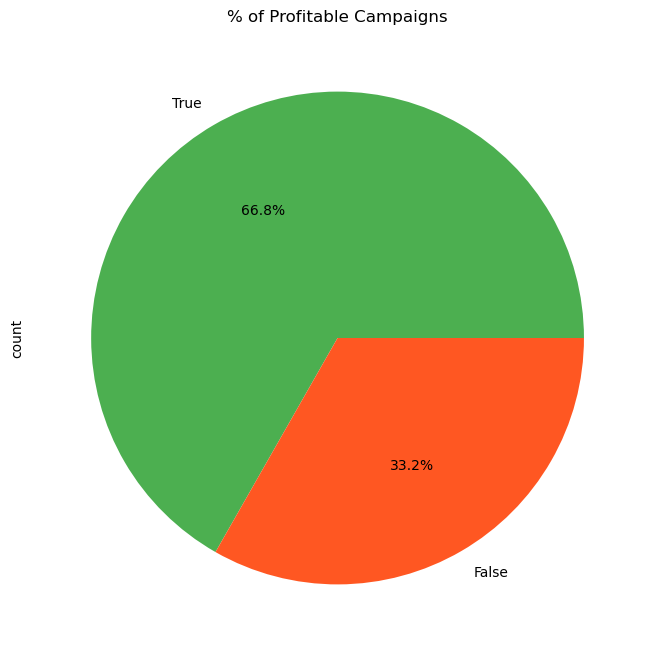

In [331]:
plt.figure(figsize=(8, 8))
df['Profitable'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#4CAF50', '#FF5722'], 
    title='% of Profitable Campaigns'
)
plt.show()

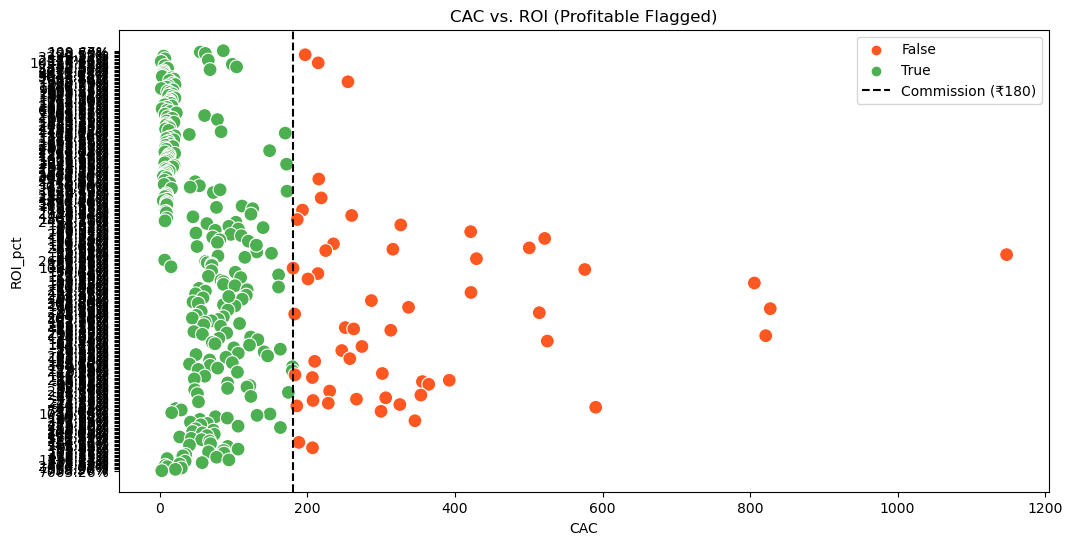

In [319]:

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='CAC',
    y='ROI_pct',
    hue='Profitable',
    palette=['#FF5722', '#4CAF50'],
    s=100
)
plt.axvline(180, color='black', linestyle='--', label='Commission (₹180)')
plt.title("CAC vs. ROI (Profitable Flagged)")
plt.legend()
plt.show()

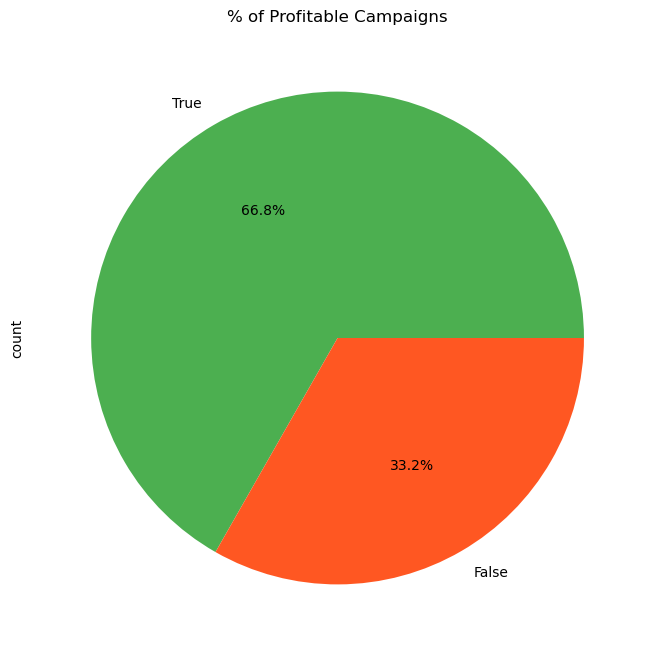

## time series analysis

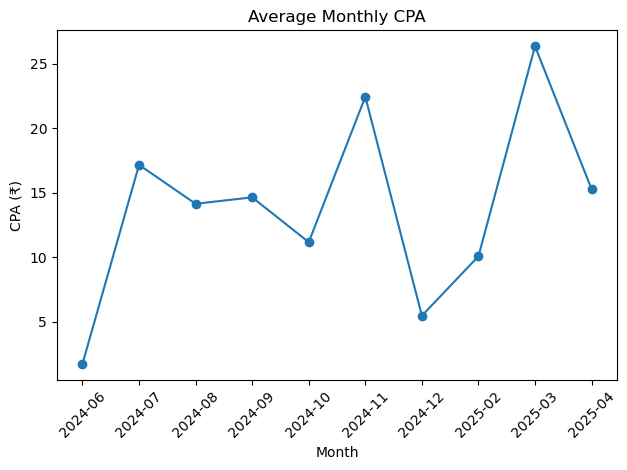

In [169]:
df['Month']  = df['Starts'].dt.to_period('M')

monthly = df.groupby('Month')['Cost per result'].mean()
plt.plot(monthly.index.astype(str), monthly.values, marker='o')
plt.title('Average Monthly CPA')
plt.xlabel('Month')
plt.ylabel('CPA (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Lowest CPA (~₹18) in April—possibly due to fresher audiences or lower competition.

#### A sharp spike (~₹33) in November, suggesting higher ad costs during peak shopping season driving CPA up.

#### Another bump (~₹30) in February, perhaps due to Valentine’s promotions.

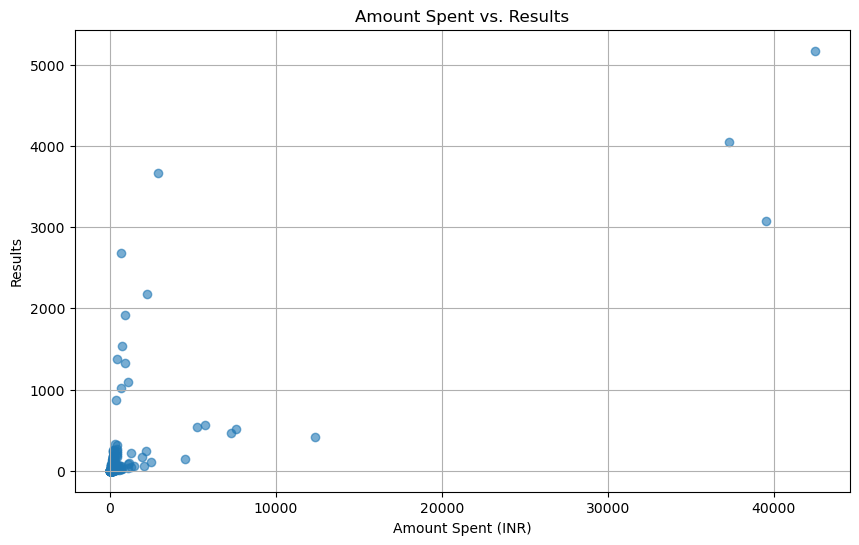

In [172]:
clean_df = df.dropna(subset=['Results', 'Amount spent (INR)'])

plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Amount spent (INR)'], clean_df['Results'], alpha=0.6)
plt.title('Amount Spent vs. Results')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Results')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128131 (\N{DANCER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


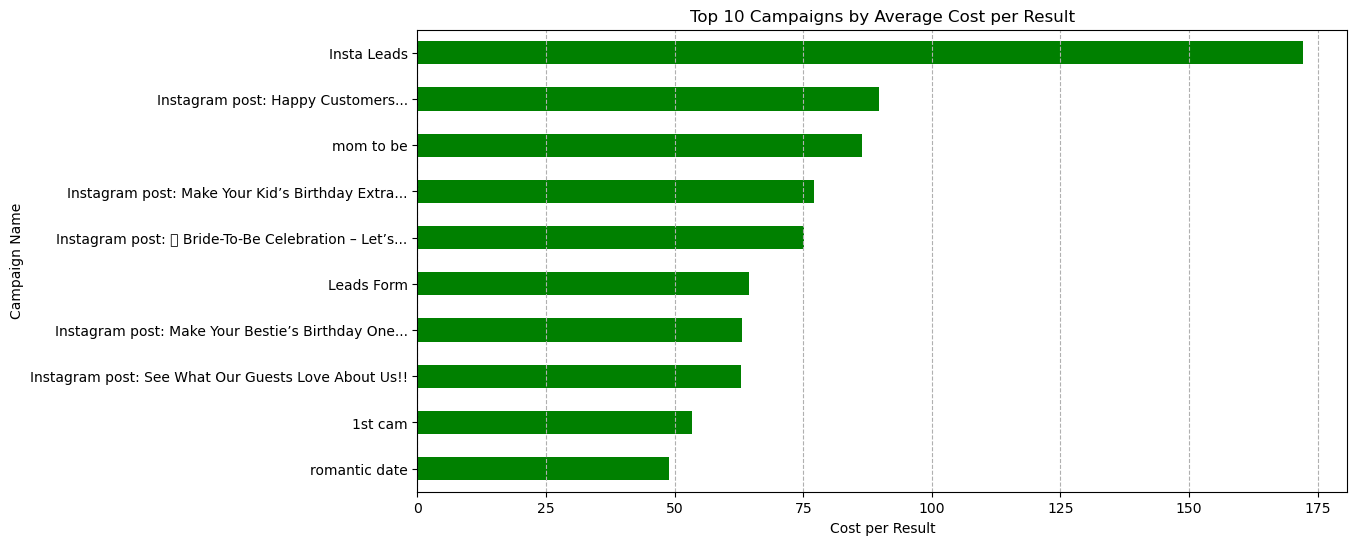

In [174]:
top_campaigns = df.groupby('Campaign name')['Cost per result'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_campaigns.plot(kind='barh', color='green')
plt.title('Top 10 Campaigns by Average Cost per Result')
plt.xlabel('Cost per Result')
plt.ylabel('Campaign Name')
plt.gca().invert_yaxis()  # Highest value at top
plt.grid(axis='x', linestyle='--')
plt.show()

In [199]:
df.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,...,Expected conversions (15%),Expected conversions,total_profit (per conv),total_profit,Profit_per_Conversion,break_even_profit,Profit Margin,ROI_pct,profitable,Month
0,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,...,460.65,460.65,82917.0,82917.0,85.850733,85.850733,94.149267,109.67%,True,2024-09
1,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,...,775.50,775.50,139590.0,139590.0,54.761728,54.761728,125.238272,228.70%,True,2024-09
2,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,...,606.45,606.45,109161.0,109161.0,61.527562,61.527562,118.472438,192.55%,True,2024-09
3,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,...,62.70,62.70,11286.0,11286.0,196.877033,196.877033,-16.877033,-8.57%,False,2025-02
4,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,...,548.85,548.85,98793.0,98793.0,5.248848,5.248848,174.751152,3329.32%,True,2025-03


In [201]:
cols=['total_profit (per conv)','total_profit']
df.drop(cols,axis=1)



,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,...,Reporting starts,Reporting ends,Expected conversions (15%),Expected conversions,Profit_per_Conversion,break_even_profit,Profit Margin,ROI_pct,profitable,Month
0,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,...,2024-05-01,2025-04-30,460.65,460.65,85.850733,85.850733,94.149267,109.67%,True,2024-09
1,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,...,2024-05-01,2025-04-30,775.50,775.50,54.761728,54.761728,125.238272,228.70%,True,2024-09
2,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,...,2024-05-01,2025-04-30,606.45,606.45,61.527562,61.527562,118.472438,192.55%,True,2024-09
3,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,...,2024-05-01,2025-04-30,62.70,62.70,196.877033,196.877033,-16.877033,-8.57%,False,2025-02
4,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,...,2024-05-01,2025-04-30,548.85,548.85,5.248848,5.248848,174.751152,3329.32%,True,2025-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,8th Campaign,NEW VIDEOS,archived,adset,2,2,1.000000,7-day click or 1-day view,NaN,NaN,...,2024-05-01,2025-04-30,NaN,NaN,NaN,NaN,NaN,nan%,False,2025-03
384,Couple Friendly,Couple Friendly,archived,adset,2,2,1.000000,7-day click or 1-day view,NaN,NaN,...,2024-05-01,2025-04-30,NaN,NaN,NaN,NaN,NaN,nan%,False,2024-08
385,Instagram post: Make Your Bestie’s Birthday On...,Instagram Post,archived,adset,1,1,1.000000,7-day click or 1-day view,NaN,NaN,...,2024-05-01,2025-04-30,NaN,NaN,NaN,NaN,NaN,nan%,False,2025-03
386,Review Video,Review video,archived,adset,1,1,1.000000,7-day click or 1-day view,NaN,NaN,...,2024-05-01,2025-04-30,NaN,NaN,NaN,NaN,NaN,nan%,False,2024-08


In [321]:
data.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,...,Reporting ends,Expected conversions,total_commision,CAC,Profit,expected_conversions,Break-even_Commission,Profit_margin,ROI_pct,Profitable
0,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,...,2025-04-30,460.65,82917.0,85.850733,43369.86,460.65,85.850733,94.149267,109.67%,True
1,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,...,2025-04-30,775.50,139590.0,54.761728,97122.28,775.50,54.761728,125.238272,228.70%,True
2,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,...,2025-04-30,606.45,109161.0,61.527562,71847.61,606.45,61.527562,118.472438,192.55%,True
3,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,...,2025-04-30,62.70,11286.0,196.877033,-1058.19,62.70,196.877033,-16.877033,-8.57%,False
4,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,...,2025-04-30,548.85,98793.0,5.248848,95912.17,548.85,5.248848,174.751152,3329.32%,True
